### Time Series: Explore Lesson
**Corey Solitaire**   
10.28.2020

In [1]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data, opsd_germany_daily
from prepare import prepped_store_df, prepped_energy_df

# Store DF

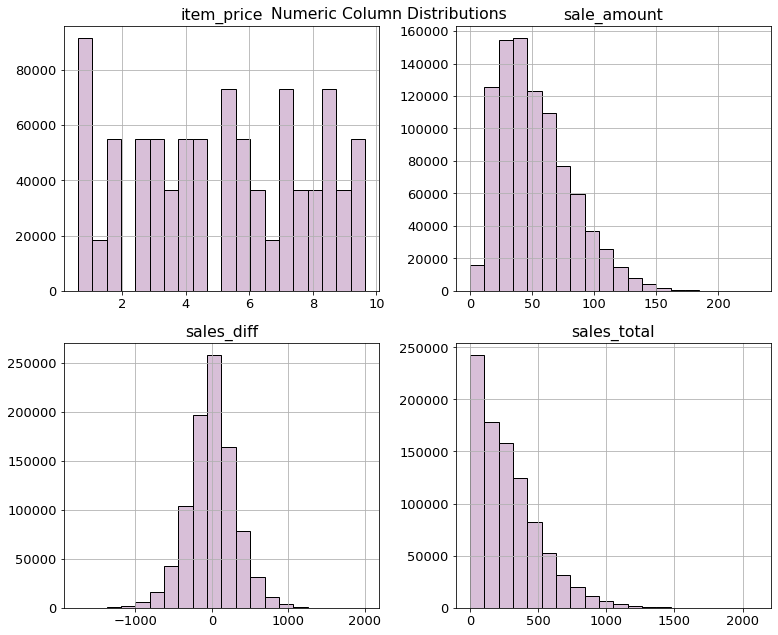

In [2]:
df = get_store_data()
store_df = prepped_store_df(df)

### Using your store items data you prepped in lesson 2 exercises:

#### 1. Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

In [3]:
# Call df
df = store_df

In [4]:
# Determine interval of data
df = df.resample('D').sum()
df.head()

,sale_amount,item_price,sales_total,sales_diff
sale_date,,,,
2013-01-01 00:00:00+00:00,13696.0,2580.2,73844.01,200.06
2013-01-02 00:00:00+00:00,13678.0,2580.2,73570.58,41.58
2013-01-03 00:00:00+00:00,14488.0,2580.2,78169.48,-185.35
2013-01-04 00:00:00+00:00,15677.0,2580.2,84467.73,73.19
2013-01-05 00:00:00+00:00,16237.0,2580.2,87621.85,-129.48


#### Human Based Approach

- Data spans from 2013 - 2016, so I will use **2013-2015(Train)** and **2016(Test)**

In [5]:
# Create train df
train = df[:'2015'] # includes 2015
# Create test df
test = df['2016']

In [6]:
train.head()

,sale_amount,item_price,sales_total,sales_diff
sale_date,,,,
2013-01-01 00:00:00+00:00,13696.0,2580.2,73844.01,200.06
2013-01-02 00:00:00+00:00,13678.0,2580.2,73570.58,41.58
2013-01-03 00:00:00+00:00,14488.0,2580.2,78169.48,-185.35
2013-01-04 00:00:00+00:00,15677.0,2580.2,84467.73,73.19
2013-01-05 00:00:00+00:00,16237.0,2580.2,87621.85,-129.48


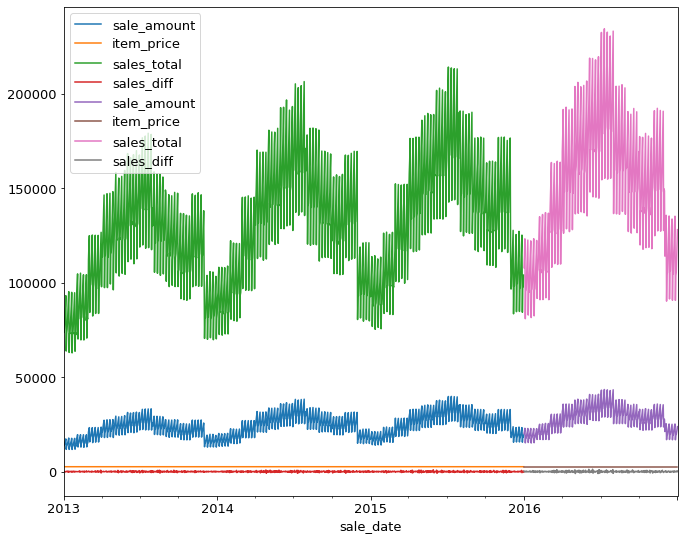

In [7]:
# Visualize df (Sanity Check)
ax = train.plot()
test.plot(ax=ax)
plt.show()

#### 2. Validate your splits by plotting X_train and y_train.

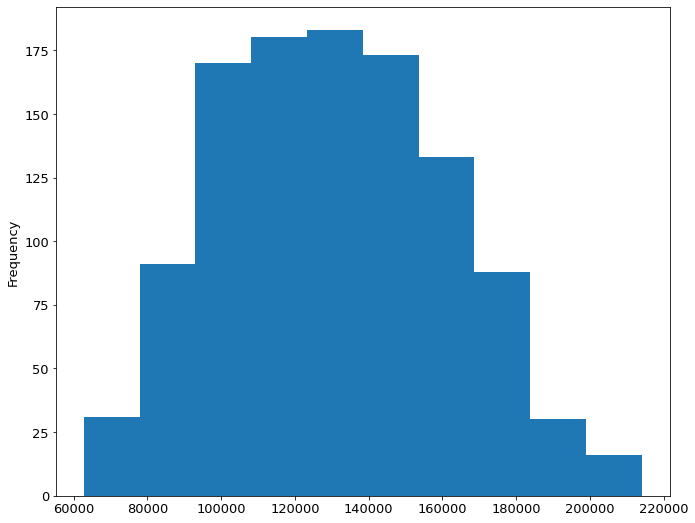

In [8]:
# Visualize y_train
y = train.sales_total
y.plot.hist()
plt.show()

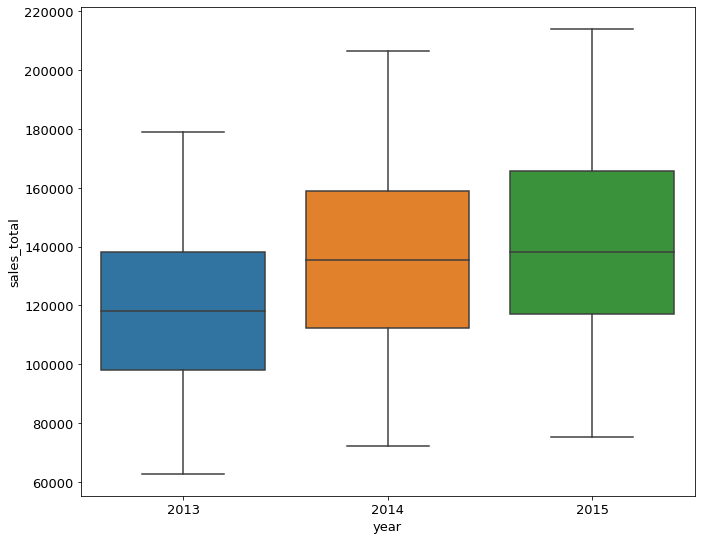

In [9]:
train['year'] = train.index.year
sns.boxplot(data = train, y='sales_total', x='year')
plt.show()

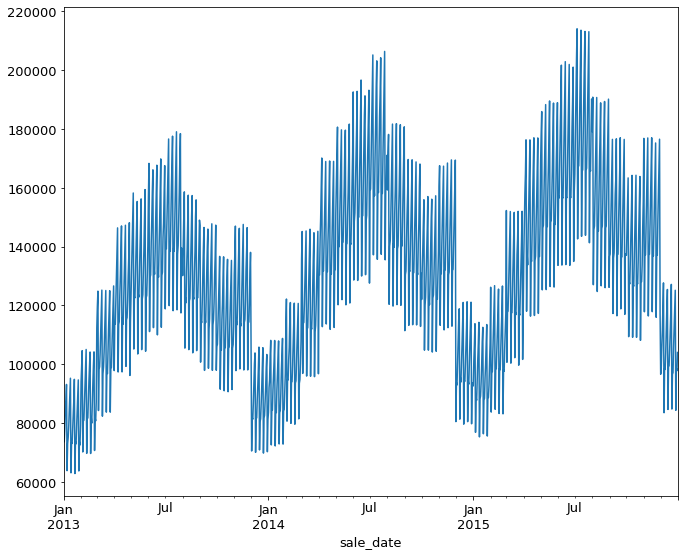

In [10]:
# Plots target variable over time
y.plot()
plt.show()

#### 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

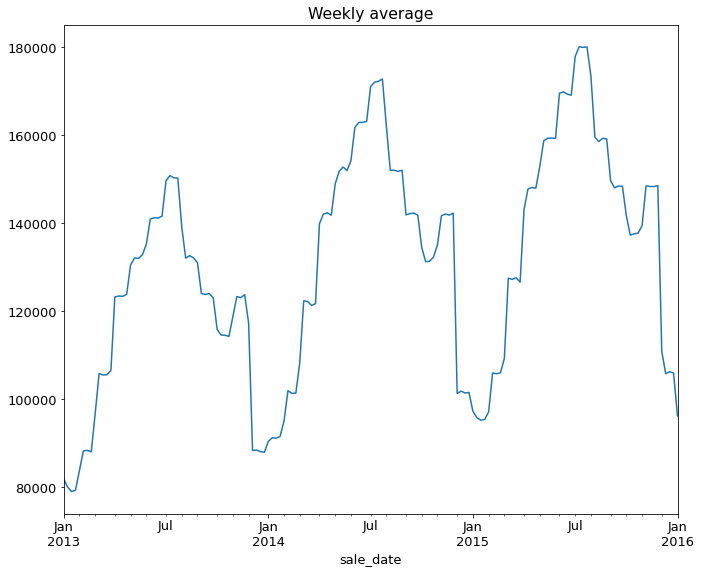

In [11]:
# Weekly average 
y.resample('W').mean().plot(title='Weekly average')
plt.show()

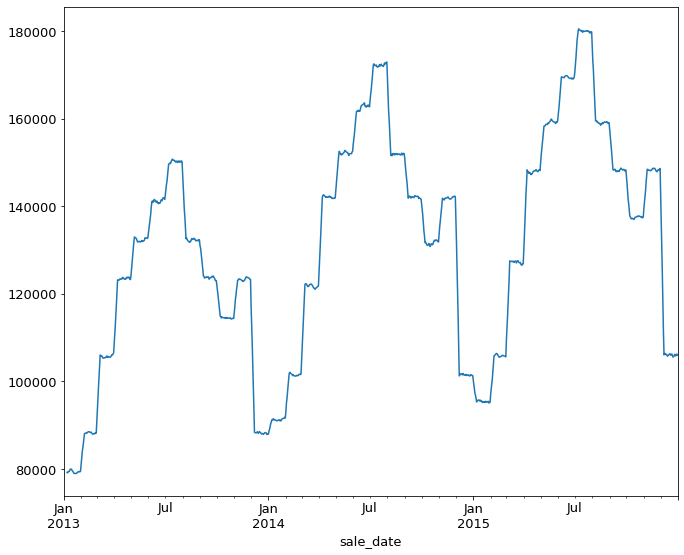

In [12]:
# 7day rolling average
y = train.sales_total
y.rolling(7).mean().plot(label='7 day weekly Avg')
plt.show()

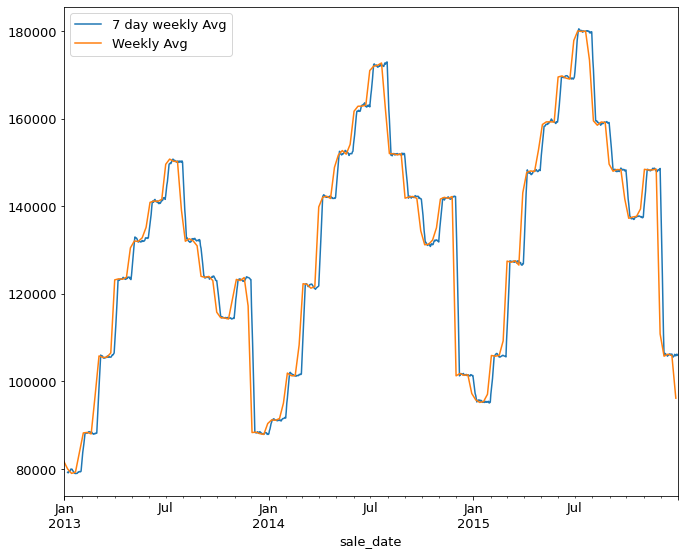

In [13]:
# Both plots together
y = train.sales_total
y.rolling(7).mean().plot(label='7 day weekly Avg')
y.resample('W').mean().plot(label= 'Weekly Avg')
plt.legend()
plt.show()

***

`Weekly avg preserves the shape of daily data, but smooths out variability`

***

#### 4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

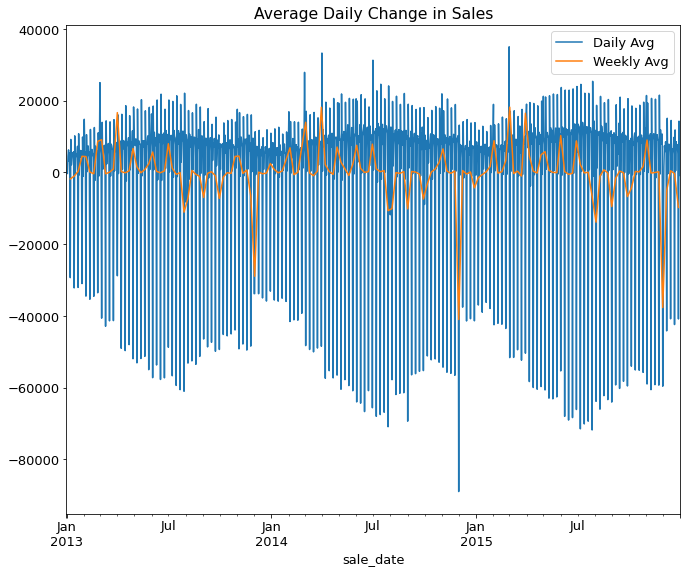

In [14]:
y = train.sales_total
y.diff().plot(label='Daily Avg')
y.resample('W').mean().diff().plot(label= 'Weekly Avg')
plt.title('Average Daily Change in Sales')
plt.legend()
plt.show()

***

`Usage appears to trainsition smoothly daily, weekly, monthly, and annually`

***

#### 5. Plot a time series decomposition.

In [15]:
# Decomposition Code DF
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,NaN,-37435.450173,NaN
2013-01-13 00:00:00+00:00,79990.601429,NaN,-38017.166821,NaN
2013-01-20 00:00:00+00:00,78973.360000,NaN,-38637.757797,NaN
2013-01-27 00:00:00+00:00,79272.691429,NaN,-38633.862371,NaN
2013-02-03 00:00:00+00:00,83792.507143,NaN,-36345.604129,NaN


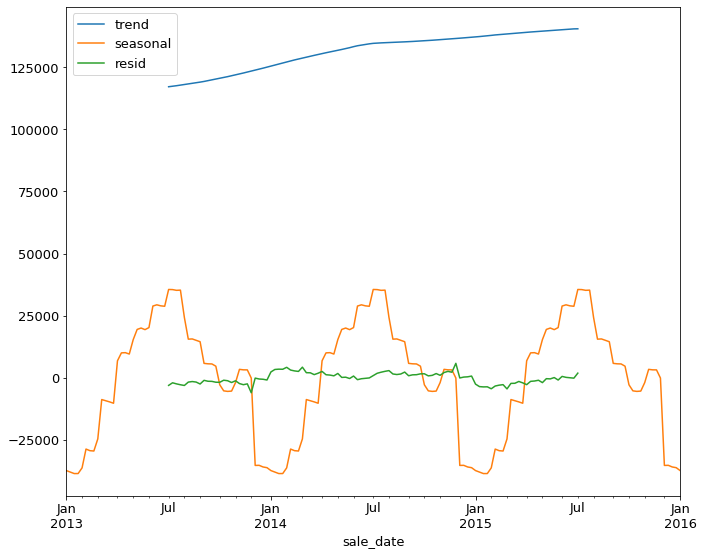

In [16]:
# Decomposition Code: Visual
decomposition.iloc[:, 1:].plot()

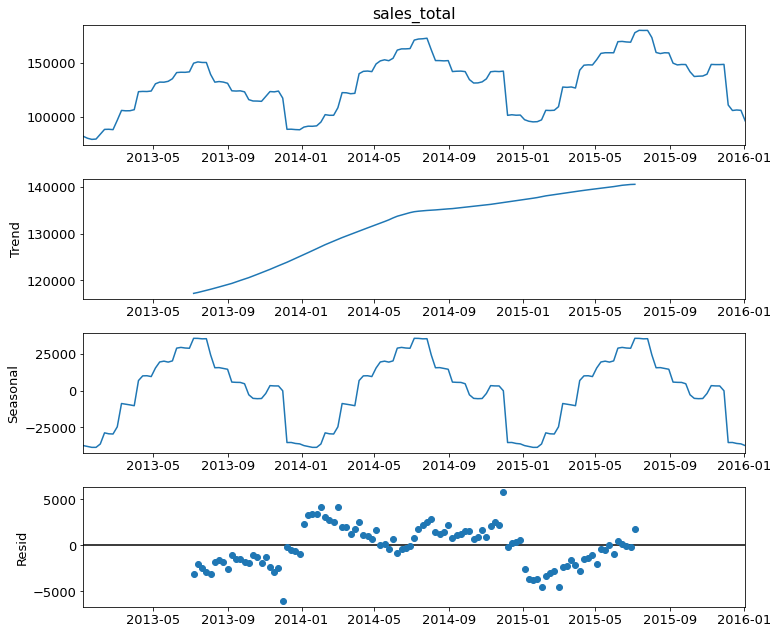

In [17]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

#### 6. Create a lag plot (day over day).

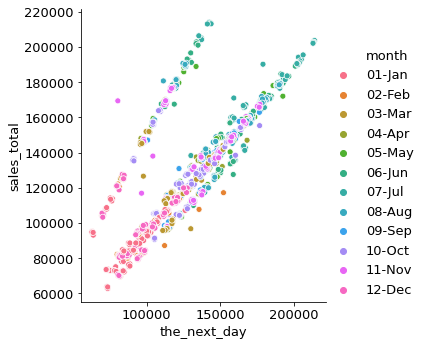

In [18]:
# Each y-value and the next y-value
# total sales for today vs tomorrow
# y = train.sales_total
# plt.scatter(y, y.shift(-1))
# plt.xlabel('$y$')
# plt.ylabel('$y_{t + 1}$')
# plt.title('Lag plot with lag=1')
# plt.show()

# Visualize Monthly
day = pd.DataFrame(train.sales_total)
day['the_next_day'] = day.sales_total.shift(-1)
day['month'] = day.index.strftime('%m-%b')
sns.relplot(data=day, y='sales_total', x='the_next_day', hue='month')
plt.show()

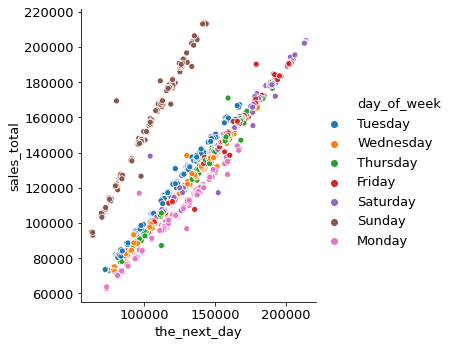

In [19]:
# Visualize Day of the Week

day = pd.DataFrame(train.sales_total)
day['the_next_day'] = day.sales_total.shift(-1)
day['day_of_week'] = day.index.strftime('%A')
sns.relplot(data=day, y='sales_total', x='the_next_day', hue='day_of_week')
plt.show()

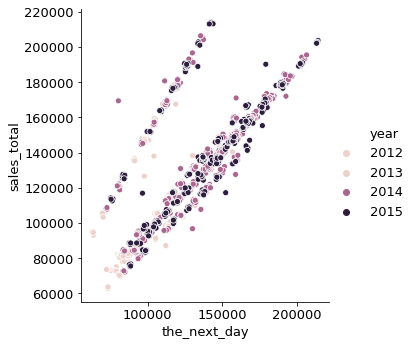

In [20]:
# Visualize Yearly
day = pd.DataFrame(train.sales_total)
day['the_next_day'] = day.sales_total.shift(-1)
day['year'] = day.index.strftime('%Y')
sns.relplot(data=day, y='sales_total', x='the_next_day', hue='year')
plt.show()

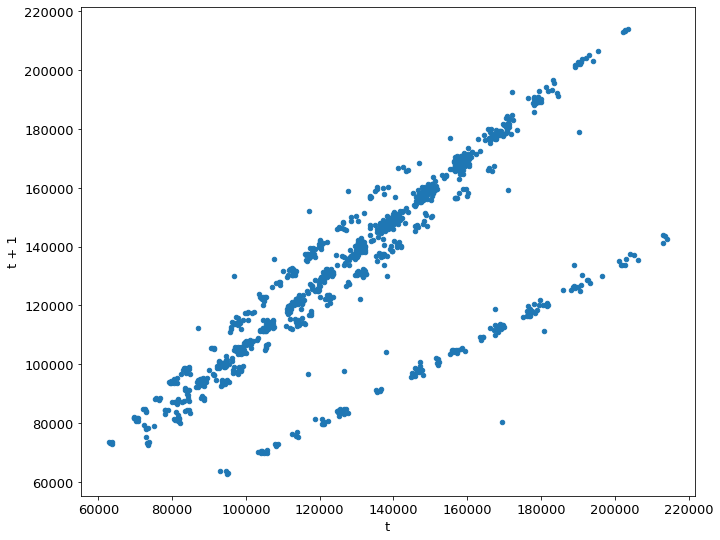

In [21]:
# Daily lag plot
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')
plt.show()

,sale_amount,item_price,this_week,sales_diff,year,y(t + 1),the_next_week
sale_date,,,,,,,
2013-01-06 00:00:00+00:00,15177.833333,2580.2,81794.583333,1.843333,2013.0,80116.838333,79990.601429
2013-01-13 00:00:00+00:00,14843.142857,2580.2,79990.601429,31.774286,2013.0,79884.427143,78973.360000
2013-01-20 00:00:00+00:00,14707.142857,2580.2,78973.360000,-4.914286,2013.0,78938.260000,79272.691429
2013-01-27 00:00:00+00:00,14756.857143,2580.2,79272.691429,-2.342857,2013.0,79398.127143,83792.507143
2013-02-03 00:00:00+00:00,15575.285714,2580.2,83792.507143,-24.342857,2013.0,84716.047143,88227.801429
...,...,...,...,...,...,...,...
2015-12-06 00:00:00+00:00,20585.571429,2580.2,110847.644286,-77.451429,2015.0,106068.528571,105751.867143
2015-12-13 00:00:00+00:00,19658.571429,2580.2,105751.867143,24.025714,2015.0,105912.010000,106217.608571
2015-12-20 00:00:00+00:00,19755.142857,2580.2,106217.608571,-18.291429,2015.0,106236.561429,105900.275714


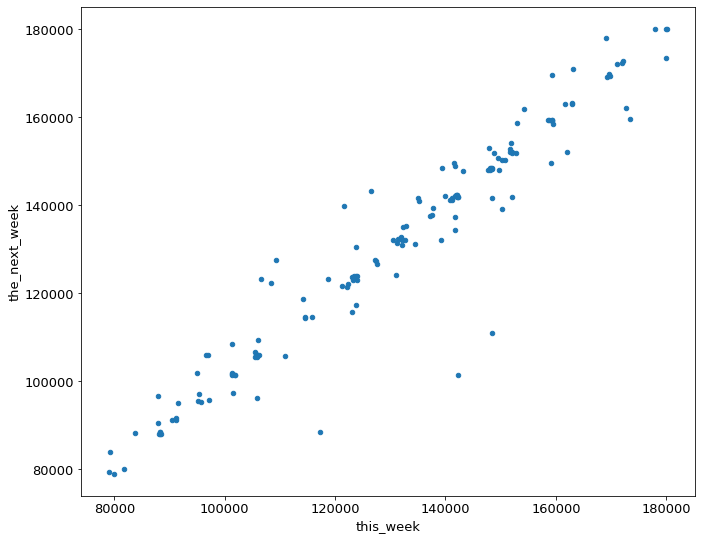

In [22]:
# Weekly lag plot
# Lag plot (1), sampled weekly (this week vs. next week)
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,sale_amount,item_price,this_month,sales_diff,year,y(t + 1),1_month_out
sale_date,,,,,,,
2013-01-31 00:00:00+00:00,14674.322581,2580.2,78947.361290,4.643226,2013,79599.708065,88205.927500
2013-02-28 00:00:00+00:00,16407.750000,2580.2,88205.927500,1.361071,2013,88853.690357,107090.825161
2013-03-31 00:00:00+00:00,19915.548387,2580.2,107090.825161,-4.833871,2013,106626.335484,122230.041000
2013-04-30 00:00:00+00:00,22742.466667,2580.2,122230.041000,2.569333,2013,123073.880333,132331.561290
2013-05-31 00:00:00+00:00,24620.709677,2580.2,132331.561290,-0.428387,2013,133415.857097,142630.639333
2013-06-30 00:00:00+00:00,26519.900000,2580.2,142630.639333,28.766000,2013,141366.147000,148440.620323
2013-07-31 00:00:00+00:00,27610.387097,2580.2,148440.620323,-28.023871,2013,148805.234516,133091.687419
2013-08-31 00:00:00+00:00,24734.225806,2580.2,133091.687419,-1.113548,2013,133640.136452,123618.847000
2013-09-30 00:00:00+00:00,22996.900000,2580.2,123618.847000,2.573667,2013,122247.777000,113934.031935


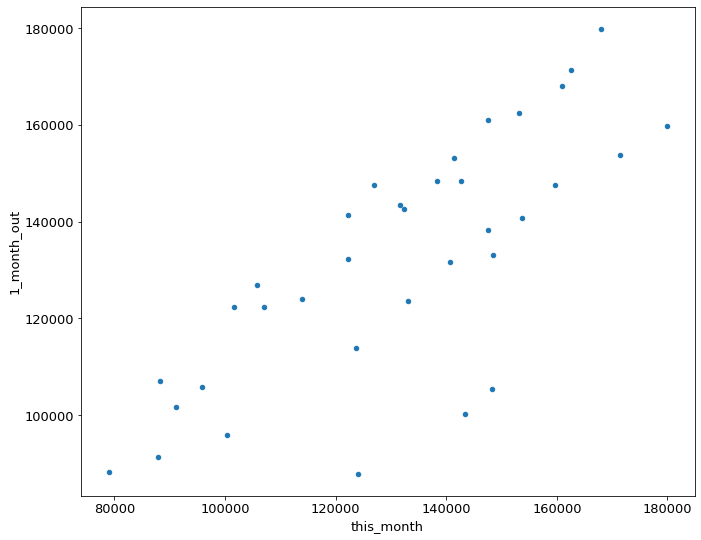

In [23]:
# Monthly Lag Plot

weekly = train.resample('M').mean()
weekly['1_month_out'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_month'})
weekly.plot.scatter(x='this_month', y='1_month_out')
weekly

#### 7. Run a lag correlation.

<function matplotlib.pyplot.show(*args, **kw)>

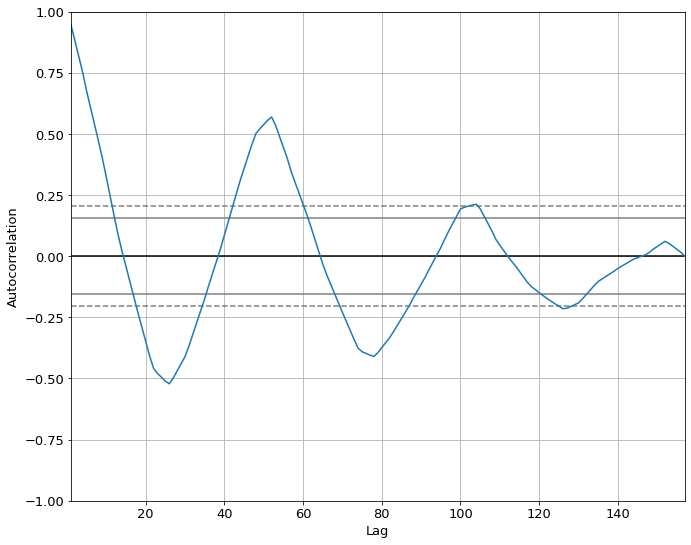

In [24]:
# Autocorrelation Plot
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.show

***

`The predictive value of the correlation is only statistically significant for 6 years from today.  In realilty sales this week are only .5 correlated to sales 2 years from now.`

***

### 8. Run a seasonal plot

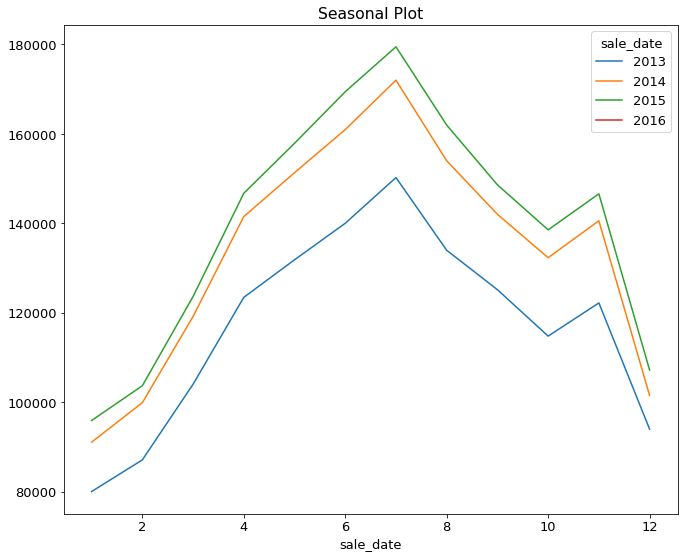

In [25]:
# Seasonal Plot
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

# Energy DF

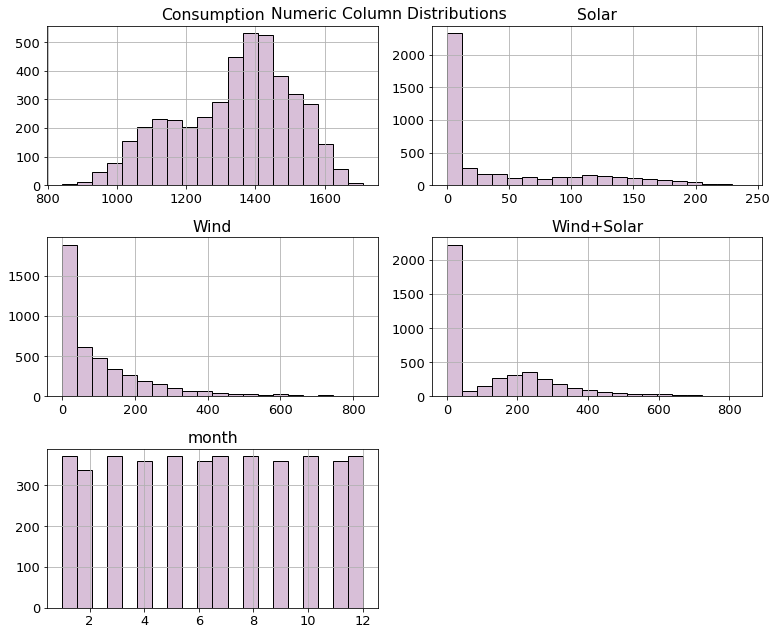

,Consumption,Wind,Solar,Wind+Solar,month,weekday
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,Sunday
2006-01-02,1380.521,0.0,0.0,0.0,1,Monday
2006-01-03,1442.533,0.0,0.0,0.0,1,Tuesday
2006-01-04,1457.217,0.0,0.0,0.0,1,Wednesday
2006-01-05,1477.131,0.0,0.0,0.0,1,Thursday


In [26]:
df = opsd_germany_daily()
energy_df = prepped_energy_df(df)
energy_df.head()

### Using your OPS data you prepped in lesson 2 exercises:

#### 1. Split your data into train and test using the percent cutoff method.

In [27]:
df = energy_df
# Determine interval of data
df['year'] = df.index.year
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,weekday,year
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,Sunday,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,Monday,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,Tuesday,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,Wednesday,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,Thursday,2006


#### Percent Cutoff Method

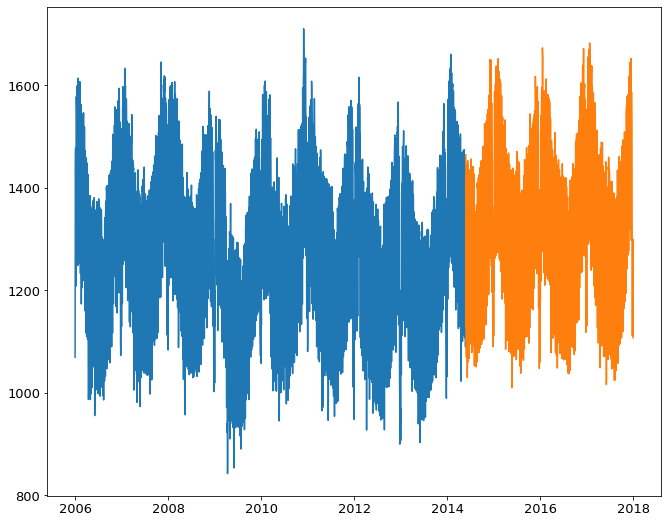

In [28]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)
plt.show()

#### 2. Validate your splits by plotting X_train and y_train.

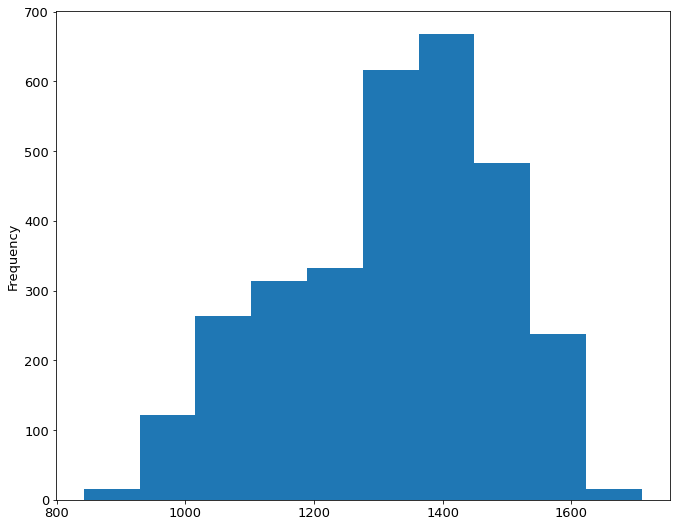

In [29]:
# Visualize y_train
y = train.Consumption
y.plot.hist()
plt.show()

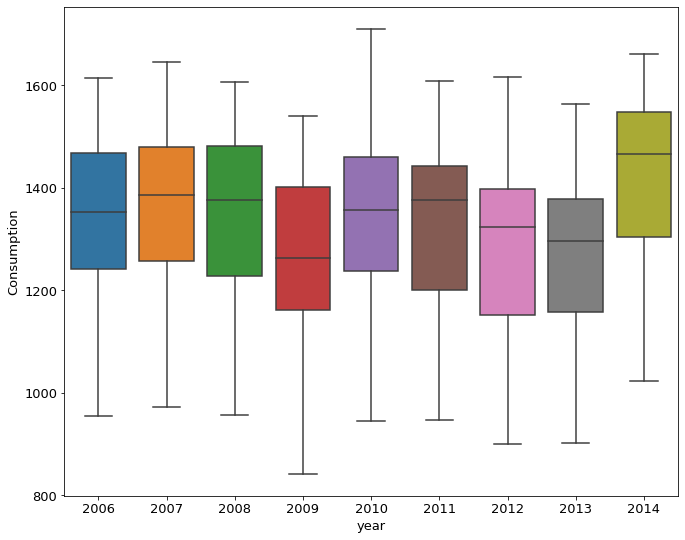

In [30]:
sns.boxplot(data = train, y='Consumption', x='year')
plt.show()

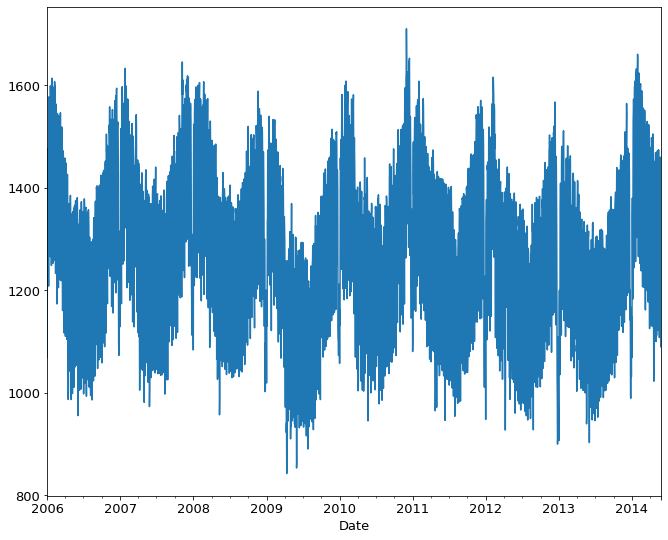

In [31]:
# Plots target variable over time
y.plot()
plt.show()

#### 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

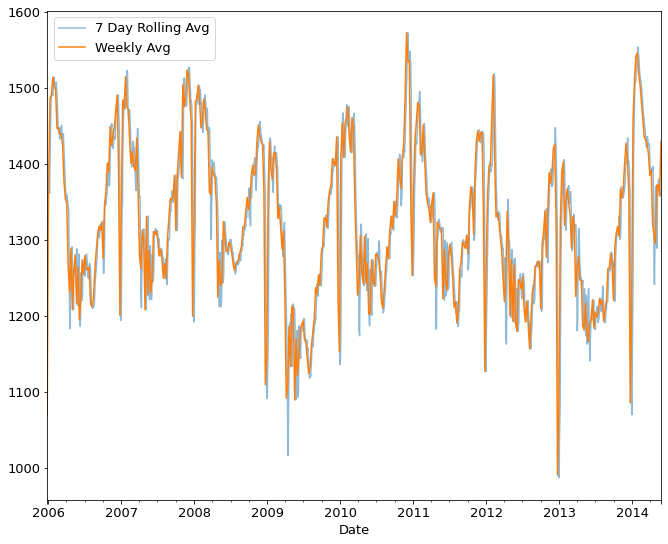

In [32]:
# Both plots together
y = train.Consumption
y.rolling(7).mean().plot(label = '7 Day Rolling Avg', alpha = .5)
y.resample('W').mean().plot(label= 'Weekly Avg')
plt.legend()
plt.show()

#### 4. Group the electricity consumption time series by month of year, to explore annual seasonality.

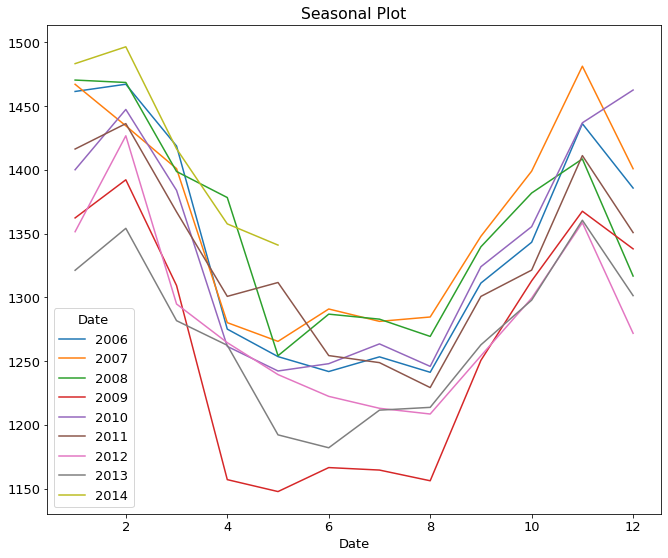

In [33]:
# Seasonal Plot
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

#### 5. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

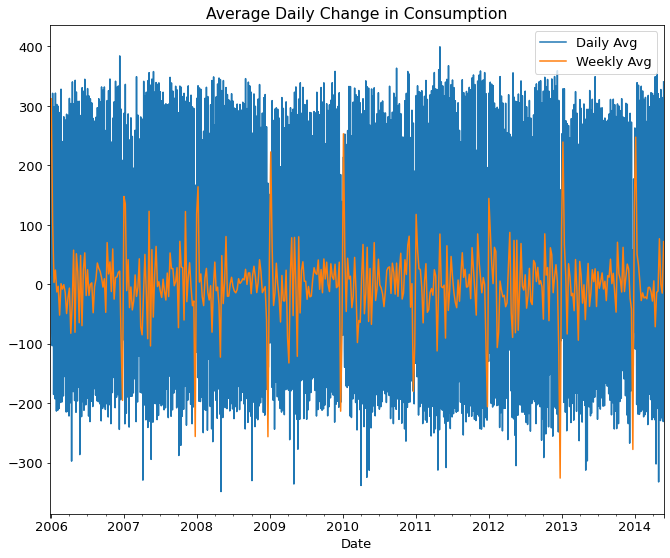

In [34]:
y = train.Consumption
y.diff().plot(label='Daily Avg')
y.resample('W').mean().diff().plot(label= 'Weekly Avg')
plt.title('Average Daily Change in Consumption')
plt.legend()
plt.show()

***

`Hard to spot any trends in the data`

***

#### 6. Plot a time series decomposition. Takeaways?

In [35]:
# Decomposition Code DF
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-68.437315,NaN
2006-01-08,1381.300143,NaN,-125.834756,NaN
2006-01-15,1486.730286,NaN,35.842411,NaN
2006-01-22,1490.031143,NaN,106.451350,NaN
2006-01-29,1514.176857,NaN,122.022124,NaN


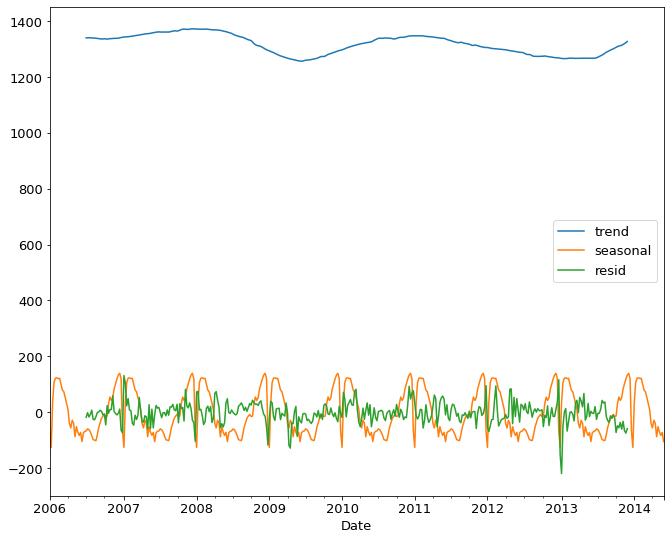

In [36]:
# Decomposition Code: Visual
decomposition.iloc[:, 1:].plot()

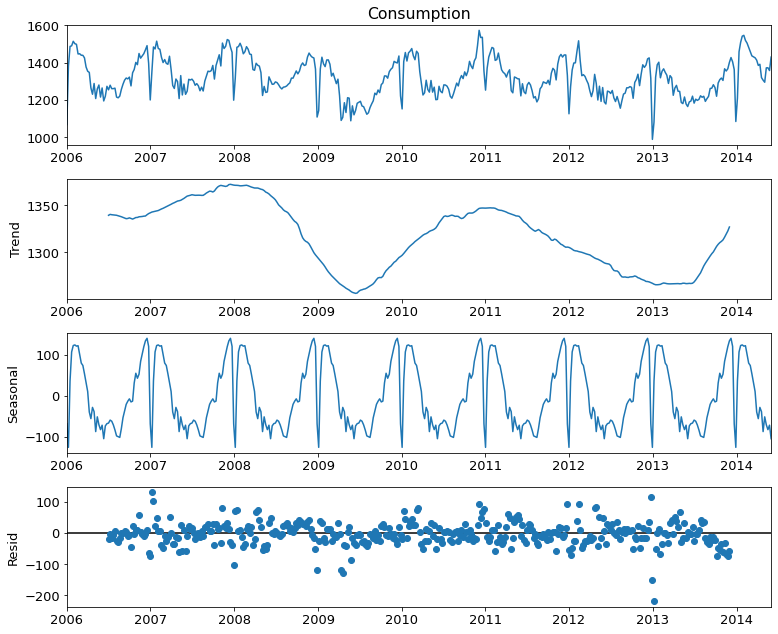

In [37]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Bonus:

If time:

For each store I want to see how many items were sold over a period of time, for each item. Find a way to chart this. Hints: Subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket. 